In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
sales_data = pd.read_csv("product_sales.csv")
perc =[.20, .40, .60, .80]
include =['object', 'float', 'int']
desc = sales_data.describe(percentiles = perc, include = include)
desc

,item_id,unit_price,unit_cost,units_sold,incr_cvr,incr_sales
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,125.500000,60.620000,51.596000,1.500400,0.136608,0.050986
std,72.312977,28.318959,24.182223,0.839511,0.157928,0.029084
min,1.000000,10.000000,9.000000,0.100000,0.000000,0.000370
20%,50.800000,33.800000,28.000000,0.600000,0.000000,0.020262
40%,100.600000,49.000000,43.000000,1.200000,0.005000,0.043162
50%,125.500000,57.000000,50.500000,1.400000,0.069000,0.051620
60%,150.400000,69.000000,57.400000,1.800000,0.135000,0.061298
80%,200.200000,89.000000,75.000000,2.300000,0.288400,0.080604
max,250.000000,110.000000,105.000000,3.100000,0.615000,0.099430


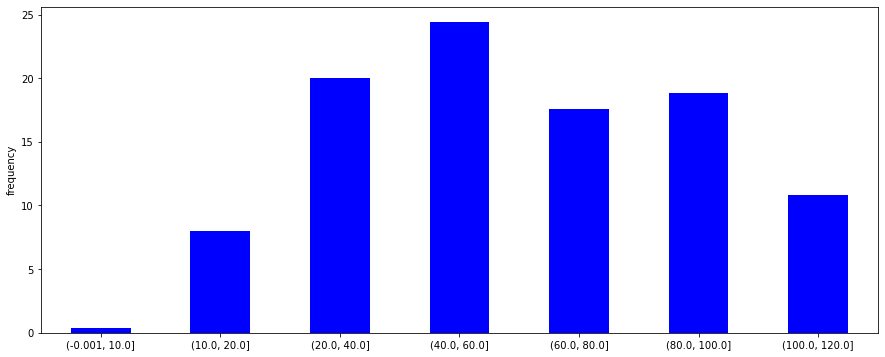

In [3]:
out = pd.cut(sales_data['unit_price'], bins=[0, 10, 20, 40,60, 80, 100, 120], include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="b", figsize=(15,6))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.ylabel("frequency")
plt.show()

<AxesSubplot:xlabel='unit_price'>

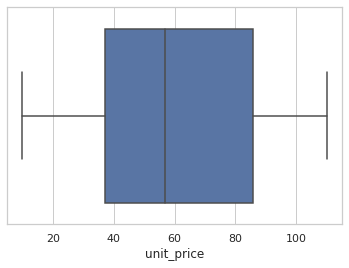

In [4]:
#sns.displot(sales_data, x="unit_price", kind="kde", bw_adjust=2)

sns.set_theme(style="whitegrid")
#ax = sns.violinplot(x=sales_data["unit_price"])
sns.boxplot(x=sales_data["unit_price"])

In [5]:
sales_data['price_frqn_cat'] = pd.cut(sales_data.unit_price, [-np.inf, 10, 20, 40, 60, 80, 100, 120, np.inf],labels=['P1','P2','P3','P4','P5','P6','P7','P8'])
grouped = sales_data.groupby(
    ['price_frqn_cat']
).agg({
    'unit_price': ["min","max","mean","count"]
}
)
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]
grouped.head(10)

,unit_price_min,unit_price_max,unit_price_mean,unit_price_count
price_frqn_cat,,,,
P1,10.0,10.0,10.000000,1
P2,11.0,20.0,16.500000,20
P3,21.0,40.0,31.040000,50
P4,41.0,60.0,50.098361,61
P5,62.0,80.0,70.613636,44
P6,81.0,100.0,90.361702,47
P7,101.0,110.0,105.666667,27
P8,NaN,NaN,NaN,0


<AxesSubplot:xlabel='price_frqn_cat', ylabel='units_sold'>

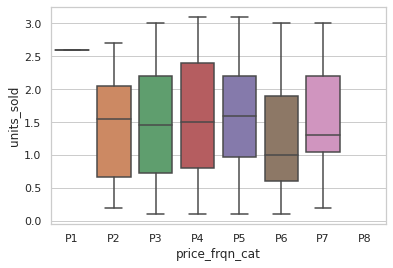

In [6]:
sns.boxplot(x="price_frqn_cat", y="units_sold", data=sales_data)

<AxesSubplot:xlabel='price_frqn_cat', ylabel='incr_cvr'>

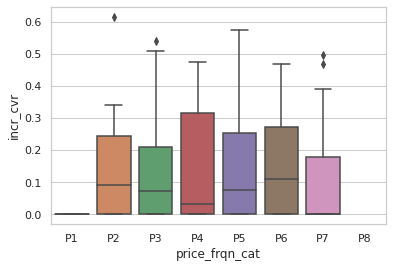

In [7]:
sns.boxplot(x="price_frqn_cat", y="incr_cvr", data=sales_data)

<AxesSubplot:xlabel='price_frqn_cat', ylabel='incr_sales'>

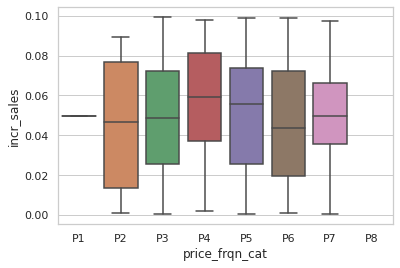

In [8]:
sns.boxplot(x="price_frqn_cat", y="incr_sales", data=sales_data)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


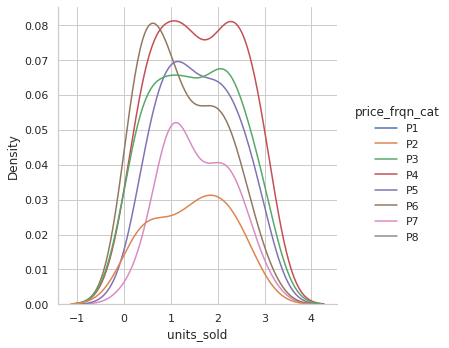

In [9]:
sns.displot(sales_data, x="units_sold", hue="price_frqn_cat", kind="kde")

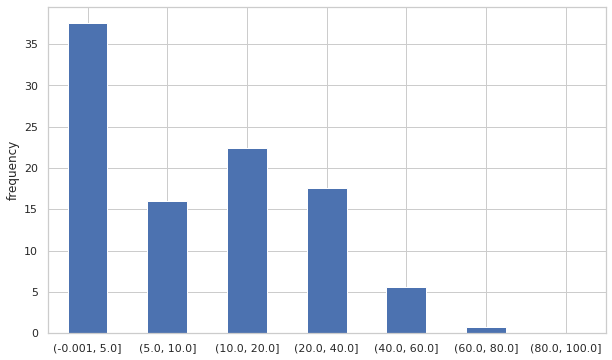

In [10]:
sales_data['profit']=sales_data['units_sold']*(sales_data['unit_price']-sales_data['unit_cost'])
out = pd.cut(sales_data['profit'], bins=[0, 5, 10, 20, 40,60, 80, 100], include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="b", figsize=(10,6))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.ylabel("frequency")
plt.show()

<AxesSubplot:xlabel='incr_cvr'>

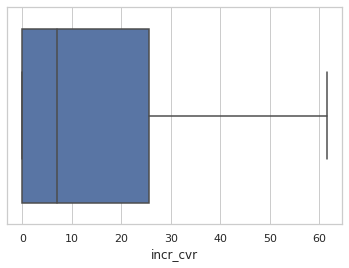

In [11]:
#sns.displot(sales_data, x="incr_cvr", kind="kde", bw_adjust=4)
#sns.violinplot(x=sales_data["incr_cvr"])
incr_cvr_val = sales_data["incr_cvr"] * 100
sns.boxplot(x=incr_cvr_val)

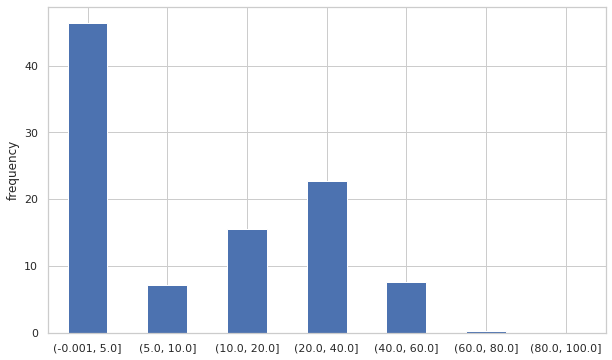

In [12]:
out = pd.cut(incr_cvr_val, bins=[0, 5, 10, 20, 40,60, 80, 100], include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="b", figsize=(10,6))
plt.ylabel("frequency")
plt.xlabel("cvr_incr_group")
plt.show()

In [42]:
sales_data['incr_cvr_perc'] = sales_data["incr_cvr"] * 100
sales_data['incr_cvr_cat'] = pd.cut(sales_data['incr_cvr_perc'], [-np.inf, 0, 5, 10, 20, 40, 60, 80],
                                    labels=['-inf_0','0-5','5-10','10-20','20-40','40-60','60-80'])
incr_cvr_groups = sales_data.groupby(
    ['incr_cvr_cat']
).agg({
    'incr_cvr_perc': ["min","max","mean","count"]
}
)
incr_cvr_groups.columns = ["".join(x) for x in incr_cvr_groups.columns.ravel()]
incr_cvr_groups.head(10)

,incr_cvr_percmin,incr_cvr_percmax,incr_cvr_percmean,incr_cvr_perccount
incr_cvr_cat,,,,
-inf_0,0.0,0.0,0.000000,99
0-5,0.2,4.9,2.629412,17
5-10,5.3,9.6,7.188889,18
10-20,10.5,20.0,15.256410,39
20-40,20.6,40.0,29.528070,57
40-60,40.1,57.5,47.447368,19
60-80,61.5,61.5,61.500000,1


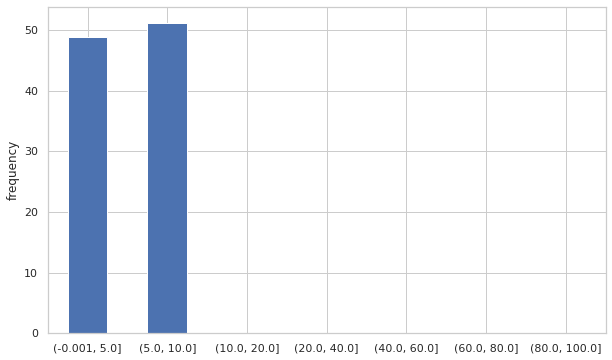

In [14]:
out = pd.cut(sales_data['incr_sales']*100, bins=[0, 5, 10, 20, 40,60, 80, 100], include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="b", figsize=(10,6))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.ylabel("frequency")
plt.xlabel("sales_incr_group")
plt.show()

<AxesSubplot:xlabel='incr_sales'>

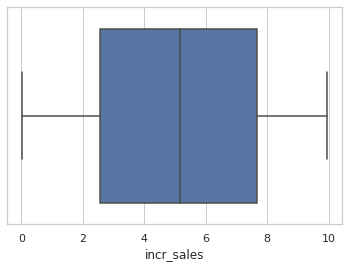

In [15]:
incr_sales_val = sales_data["incr_sales"] * 100
sns.boxplot(x=incr_sales_val)

In [48]:
sales_data['incr_sales_perc'] = sales_data['incr_sales']*100
sales_data['incr_sales_cat'] = pd.cut(sales_data['incr_sales_perc'], [0, 1, 2, 4, 6, 8, 10],labels=['0_1','1_2','2_4','4_6', '6_8', '8_10'])
incr_sales_grouped = sales_data.groupby(
    ['incr_sales_cat']
).agg({
    'incr_sales_perc': ["min","max","mean","count"]
}
)
incr_sales_grouped.columns = ["_".join(x) for x in incr_sales_grouped.columns.ravel()]
incr_sales_grouped.head(10)

,incr_sales_perc_min,incr_sales_perc_max,incr_sales_perc_mean,incr_sales_perc_count
incr_sales_cat,,,,
0_1,0.037,0.977,0.494192,26
1_2,1.033,1.991,1.499917,24
2_4,2.035,3.916,2.961100,40
4_6,4.033,5.936,4.969017,58
6_8,6.016,7.996,6.980837,49
8_10,8.009,9.943,9.001660,53


In [33]:
#sns.pairplot(sales_data)
plotdata = sales_data[['unit_price','units_sold','incr_cvr','incr_sales','profit']]
cmap =sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr = plotdata.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,unit_price,units_sold,incr_cvr,incr_sales,profit
unit_price,1.00,-0.06,-0.01,-0.03,0.50
units_sold,-0.06,1.00,0.06,-0.02,0.45
incr_cvr,-0.01,0.06,1.00,0.04,-0.01
incr_sales,-0.03,-0.02,0.04,1.00,-0.04
profit,0.50,0.45,-0.01,-0.04,1.00


In [51]:
incr_cvr_price_group = sales_data.groupby('incr_cvr_cat').agg({'unit_price': ["mean","sum"]
,'units_sold': ["mean","sum"], 'item_id': ["count"], 'profit': ["mean","sum"]})
incr_cvr_price_group.columns = ["_".join(x) for x in incr_cvr_price_group.columns.ravel()]
incr_cvr_price_group.head(10)

,unit_price_mean,unit_price_sum,units_sold_mean,units_sold_sum,item_id_count,profit_mean,profit_sum
incr_cvr_cat,,,,,,,
-inf_0,62.989899,6236,1.488889,147.4,99,13.307071,1317.4
0-5,55.176471,938,1.488235,25.3,17,15.376471,261.4
5-10,50.555556,910,1.483333,26.7,18,10.988889,197.8
10-20,61.410256,2395,1.379487,53.8,39,13.423077,523.5
20-40,59.894737,3414,1.557895,88.8,57,12.896491,735.1
40-60,65.684211,1248,1.689474,32.1,19,13.089474,248.7
60-80,14.000000,14,1.000000,1.0,1,2.000000,2.0


In [50]:
incr_sales_price_group = sales_data.groupby('incr_sales_cat').agg({'unit_price': ["mean","sum"]
,'units_sold': ["mean","sum"], 'item_id': ["count"], 'profit': ["mean","sum"]})
incr_sales_price_group.columns = ["_".join(x) for x in incr_sales_price_group.columns.ravel()]
incr_sales_price_group.head(10)

,unit_price_mean,unit_price_sum,units_sold_mean,units_sold_sum,item_id_count,profit_mean,profit_sum
incr_sales_cat,,,,,,,
0_1,57.500000,1495,1.446154,37.6,26,12.634615,328.5
1_2,64.708333,1553,1.525000,36.6,24,15.012500,360.3
2_4,64.350000,2574,1.460000,58.4,40,14.330000,573.2
4_6,60.689655,3520,1.582759,91.8,58,13.186207,764.8
6_8,60.102041,2945,1.493878,73.2,49,12.683673,621.5
8_10,57.886792,3068,1.462264,77.5,53,12.030189,637.6


In [34]:
from scipy import stats
sales_fix = pd.DataFrame()
sales_fix["unit_price"] = stats.boxcox(sales_data['unit_price'])[0]
sales_fix["units_sold"] = stats.boxcox(sales_data['units_sold'])[0]
sales_fix["incr_cvr"] = pd.Series(np.cbrt(sales_data['incr_cvr'])).values
sales_fix.tail()

,unit_price,units_sold,incr_cvr
245,10.759880,0.467087,0.661911
246,21.587929,-0.552318,0.000000
247,8.107933,0.554090,0.456290
248,27.775542,-0.206990,0.641507
249,15.678516,0.965816,0.814325


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(sales_fix)
sales_normalized = scaler.transform(sales_fix)
print(sales_normalized.mean(axis = 0).round(2)) # [0. -0. 0.]
print(sales_normalized.std(axis = 0).round(2)) # [1. 1. 1.]

[-0.  0. -0.]
[1. 1. 1.]


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

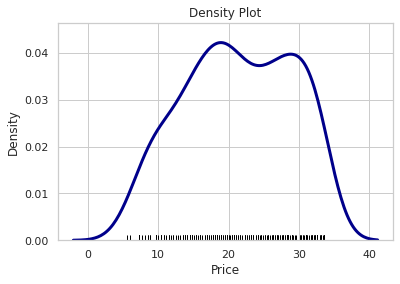

In [36]:
sns.distplot(sales_fix['unit_price'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot')
plt.xlabel('Price')
plt.ylabel('Density')

In [ ]:
sns.displot(sales_fix, x="unit_price", kind="kde")

In [ ]:
sns.displot(sales_data, x="units_sold", y="incr_sales", kind="kde", thresh=.10, levels=3)

<AxesSubplot:xlabel='unit_price', ylabel='units_sold'>

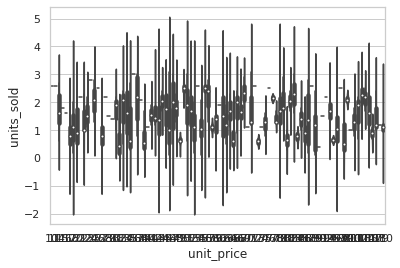

In [37]:
ax = sns.violinplot(x="unit_price", y="units_sold", data=sales_data)
ax

In [ ]:
# demand curve
sns.lmplot(x = "units_sold", y = "incr_sales", data = sales_data, height = 4)

# fit OLS model
model = ols("units_sold ~ incr_sales", data = sales_data).fit()
# print model summary
print(model.summary())

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
global b0, b1, ped_fit

ped_fit = smf.ols(formula='incr_sales ~ units_sold',data=df).fit()
ped_fit.summary()
#Linear format of the model: y = b0 + b1*x
b0 = ped_fit.params["Intercept"]
b1 = ped_fit.params["units_sold"]
smg.plot_fit(ped_fit,1)